In [171]:
import numpy as np 
import pandas as pd
import re

In [172]:
df = pd.read_csv('CSV/Nepali_house_Dataset.csv')

In [173]:
df

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ..."
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']"
3415,स्यूचाटार,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage']
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'..."


In [174]:
df.isnull().sum()

TITLE              0
LOCATION           0
PRICE              0
LAND AREA         89
BUILDUP AREA    2699
ROAD ACCESS        9
FACING           206
FLOOR             95
BEDROOM          282
BATHROOM         346
BUILT YEAR        61
PARKING         2786
AMENITIES          0
dtype: int64

In [175]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3418 entries, 0 to 3417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TITLE         3418 non-null   object 
 1   LOCATION      3418 non-null   object 
 2   PRICE         3418 non-null   object 
 3   LAND AREA     3329 non-null   object 
 4   BUILDUP AREA  719 non-null    object 
 5   ROAD ACCESS   3409 non-null   object 
 6   FACING        3212 non-null   object 
 7   FLOOR         3323 non-null   float64
 8   BEDROOM       3136 non-null   float64
 9   BATHROOM      3072 non-null   float64
 10  BUILT YEAR    3357 non-null   object 
 11  PARKING       632 non-null    object 
 12  AMENITIES     3418 non-null   object 
dtypes: float64(3), object(10)
memory usage: 347.3+ KB
None


In [176]:
aana_count = df["LAND AREA"].str.contains("aana", case=False, na=False).sum()
not_aana = df["LAND AREA"].notna().sum() - aana_count

print("aana:", aana_count)
print("not_aana:", not_aana)


aana: 3251
not_aana: 78


In [177]:
non_aana_rows = df[~df['LAND AREA'].str.contains('aana',case = False,na= False)]

In [178]:
print(non_aana_rows['LAND AREA'].head(50))

138      0.14 kattha
228      127 sq. mtr
332              NaN
342      0.12 kattha
343      0.12 kattha
357       0.5 kattha
463     1.9.9 kattha
464      0.11 kattha
480              NaN
484      2700 sq. ft
505              NaN
531              NaN
546       1.7 kattha
548              NaN
558       3.0 kattha
559      0.10 kattha
563              NaN
608              NaN
610              NaN
620       1.3 kattha
653              NaN
675              NaN
680              NaN
683      0.15 kattha
686              NaN
697              NaN
698      0.14 kattha
702              NaN
706              NaN
709              NaN
713       3.2 kattha
726       1.5 kattha
739     2000 sq. mtr
751              NaN
752       5.0 kattha
772              NaN
807       6.0 kattha
950      2400 sq. ft
981              NaN
986              NaN
993              NaN
1003     8000 sq. ft
1007     5800 sq. ft
1011             NaN
1017             NaN
1019      6.1 kattha
1026     1350 sq. ft
1052         

In [179]:
def conv_to_aana(val):
    if pd.isna(val):
        return None
    val = str(val).lower().strip()
    match_num = re.search(r'[\d.]+', val)
    if not match_num:
        return None
    try:
        num = float(match_num.group())
    except ValueError:
        return None
    if "aana" in val:
        return num
    elif "kattha" in val:
        return num * 3.3
    elif "sq. ft" in val or "sq.ft" in val:
        return num * 0.0133
    elif "sq. mtr" in val or "sqm" in val:
        return num * 0.159
    else:
        return None

In [180]:
df["LAND_AREA_AANA"] = df["LAND AREA"].apply(conv_to_aana)


In [181]:
print(df["LAND_AREA_AANA"].isna().sum())
print(df["LAND_AREA_AANA"].notna().sum())


95
3323


In [182]:
df.dropna(subset=["LAND_AREA_AANA"],inplace=True)

In [183]:
df.isnull().sum()

TITLE                0
LOCATION             0
PRICE                0
LAND AREA            0
BUILDUP AREA      2609
ROAD ACCESS          7
FACING             181
FLOOR               79
BEDROOM            257
BATHROOM           315
BUILT YEAR          60
PARKING           2696
AMENITIES            0
LAND_AREA_AANA       0
dtype: int64

In [184]:
df

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,LAND_AREA_AANA
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",4.0
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",3.0
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",2.3
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",7.0
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",4.5
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",4.5
3415,स्यूचाटार,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],4.7
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",6.3


In [185]:
not_cr_count = df[~df['PRICE'].str.contains('cr',case= False,na=False)]
print(not_cr_count['PRICE'].head(50))

4         Rs. 12000000
5         Rs. 27000000
84     Rs. 50 Lac/aana
98       Rs. 65,000 /m
99       Price on call
109      Rs. 1.4 Lac/m
111      Rs. 1.5 Lac/m
127     Rs. 1.05 Lac/m
136    Rs. 90 Lac/aana
138      Price on call
140    Rs. 3,88,000,00
159      Rs. 2.5 Lac/m
166    Rs. 21 Lac/aana
168      Rs. 60,000 /m
169      Rs. 3.5 Lac/m
171      Rs. 80,000 /m
172      Rs. 70,000 /m
173      Rs. 45,000 /m
184     Rs. 27500000  
186      Price on call
195      Price on call
197      Rs. 80,000 /m
199      Rs. 1.5 Lac/m
201      Rs. 1.6 Lac/m
202     Rs. 1.28 Lac/m
203      Price on call
210       Rs. 1.5 Lac 
211      Rs. 1.4 Lac/m
216      Rs. 90,000 /m
228      Price on call
229      Rs. 90,000 /m
231      Rs. 2.5 Lac/m
235      Rs. 3.5 Lac/m
237      Rs. 1.6 Lac/m
249      Price on call
253      Rs. 1.7 Lac/m
254     Rs. 1.85 Lac/m
255        Rs. 3 Lac/m
260      Rs. 1.5 Lac/m
281      Rs. 1.5 Lac/m
282     Rs. 1.55 Lac/m
286      Rs. 90,000 /m
290        Rs. 2 Lac/m
291        

In [186]:
def Price_to_cr(val, land_area=None):
    if pd.isna(val):
        return None

    val = str(val).lower().replace(",", "").strip()

    if "price on call" in val:
        return None


    clean_val = val.replace("rs.", "").replace("rs", "")

    num_match = re.search(r"[\d.]+", clean_val)
    if not num_match:
        return None

    try:
        num = float(num_match.group())
    except ValueError:
        return None

    if "cr" in val:
        return num
    elif "lac" in val or "lakh" in val:
        return num * 0.1
    elif "/m" in val and land_area is not None:
        return (num * land_area) / 1e7
    elif "/aana" in val and land_area is not None:
        return (num * 1e5 * land_area) / 1e7
    elif "/m" not in val and "/aana" not in val:
        if num > 1e6:
            return num / 1e7
    return None


In [187]:
df['PRICE_CR'] = df.apply(lambda row: Price_to_cr(row['PRICE'], row['LAND_AREA_AANA']), axis=1)

In [188]:
df.isnull().sum()

TITLE                0
LOCATION             0
PRICE                0
LAND AREA            0
BUILDUP AREA      2609
ROAD ACCESS          7
FACING             181
FLOOR               79
BEDROOM            257
BATHROOM           315
BUILT YEAR          60
PARKING           2696
AMENITIES            0
LAND_AREA_AANA       0
PRICE_CR           173
dtype: int64

In [189]:
df.dropna(subset=['PRICE_CR'],inplace=True)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3150 entries, 0 to 3417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITLE           3150 non-null   object 
 1   LOCATION        3150 non-null   object 
 2   PRICE           3150 non-null   object 
 3   LAND AREA       3150 non-null   object 
 4   BUILDUP AREA    680 non-null    object 
 5   ROAD ACCESS     3144 non-null   object 
 6   FACING          2991 non-null   object 
 7   FLOOR           3080 non-null   float64
 8   BEDROOM         2915 non-null   float64
 9   BATHROOM        2858 non-null   float64
 10  BUILT YEAR      3096 non-null   object 
 11  PARKING         611 non-null    object 
 12  AMENITIES       3150 non-null   object 
 13  LAND_AREA_AANA  3150 non-null   float64
 14  PRICE_CR        3150 non-null   float64
dtypes: float64(5), object(10)
memory usage: 393.8+ KB


In [191]:
def parse_parking(val):
    car, bike = 0,0
    if pd.isna(val):
        return -car,bike
    x = val.lower().strip()
    car_match = re.search(r'(\d+)\s*cars.',x)
    bike_match = re.search(r'(\d+)\s*bikes',x)
    if car_match: car = int(car_match.group(1))
    if bike_match : bike = int(bike_match.group(1))
    return car,bike


In [192]:
df[['CAR_PARKING','BIKE_PARKING']] = df["PARKING"].apply(lambda x: pd.Series(parse_parking(x)))
df["HAS_PARKING"] = ((df["CAR_PARKING"] + df["BIKE_PARKING"]) > 0).astype(int)

In [193]:
df.isna().sum()

TITLE                0
LOCATION             0
PRICE                0
LAND AREA            0
BUILDUP AREA      2470
ROAD ACCESS          6
FACING             159
FLOOR               70
BEDROOM            235
BATHROOM           292
BUILT YEAR          54
PARKING           2539
AMENITIES            0
LAND_AREA_AANA       0
PRICE_CR             0
CAR_PARKING          0
BIKE_PARKING         0
HAS_PARKING          0
dtype: int64

In [194]:
df["FACING"] = df["FACING"].fillna("Unknown")

In [195]:
df['BUILDUP AREA'].str.contains('sq. ft.',case=False,na=False).sum()

np.int64(81)

In [196]:
non_sq_buildup = df[~df['BUILDUP AREA'].str.contains('sq. ft.',case=False,na=True)]
print(non_sq_buildup['BUILDUP AREA'])

468        1069 Sq. Feet
484        2700 Sq. Feet
487     1227.10 Sq. Feet
512        1400 Sq. Feet
516      714.47 Sq. Feet
              ...       
3399          2750 Sq.ft
3414          1700 Sq.ft
3415          1700 Sq.ft
3416          3505 Sq.ft
3417              5 aana
Name: BUILDUP AREA, Length: 599, dtype: object


In [197]:
def handle_buildup_area(val):
    if pd.isna(val):
        return 0
    x = val.lower().strip()
    
    num_match = re.search(r'[\d.]+', x)
    if not num_match:
        return 0
    try:
        num = float(num_match.group())
    except ValueError:
        return 0

    if 'aana' in x:
        return num * 342.25
    elif 'sq' in x or 'ft' in x:
        return num 
    else:
        return 0 

In [198]:
df['BUILDUP_AREA_SQFT'] = df['BUILDUP AREA'].apply(handle_buildup_area)

In [199]:
def clean_year(x):
    if pd.isna(x):
        return np.nan
    nums = re.findall(r"\d+", str(x))
    if not nums:
        return np.nan
    year_bs = int(nums[0])
    year_ad = year_bs - 57
    return 2025 - year_ad 

In [200]:
df["HOUSE_AGE"] = df["BUILT YEAR"].apply(clean_year)

In [201]:
df.dropna(subset=['HOUSE_AGE'],inplace=True)

In [202]:
df["FLOOR"] = df["FLOOR"].fillna(df["FLOOR"].median())
df["BEDROOM"] = df["BEDROOM"].fillna(df["BEDROOM"].median())
df["BATHROOM"] = df["BATHROOM"].fillna(df["BATHROOM"].median())

In [203]:
df

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,LAND_AREA_AANA,PRICE_CR,CAR_PARKING,BIKE_PARKING,HAS_PARKING,BUILDUP_AREA_SQFT,HOUSE_AGE
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",4.0,2.90,1,2,1,0.00,6.0
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",3.0,4.75,2,2,1,0.00,6.0
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",2.3,1.99,1,3,1,0.00,22.0
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",7.0,4.00,4,4,1,0.00,23.0
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",6.0,1.20,4,5,1,0.00,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",4.5,2.60,0,3,1,0.00,6.0
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",4.5,3.00,0,3,1,1700.00,6.0
3415,स्यूचाटार,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],4.7,1.60,0,3,1,1700.00,10.0
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",6.3,3.50,2,7,1,3505.00,5.0


In [204]:
df['Neighbourhood'] = df['LOCATION'].apply(lambda x: x.split(',')[0].strip())

In [205]:
df

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,...,PARKING,AMENITIES,LAND_AREA_AANA,PRICE_CR,CAR_PARKING,BIKE_PARKING,HAS_PARKING,BUILDUP_AREA_SQFT,HOUSE_AGE,Neighbourhood
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,...,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",4.0,2.90,1,2,1,0.00,6.0,Imadol
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,...,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",3.0,4.75,2,2,1,0.00,6.0,Satdobato
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,...,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",2.3,1.99,1,3,1,0.00,22.0,Imadol
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,...,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",7.0,4.00,4,4,1,0.00,23.0,Bhaisepati
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,...,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",6.0,1.20,4,5,1,0.00,11.0,Maharajgunj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","Rs. 26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,...,1 Car & 3 Bikes,"['Garage', 'Parking']",4.5,2.60,0,3,1,0.00,6.0,Sitapiala
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","Rs. 30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,...,1 Car & 3 Bikes,"['Garage', 'Parking']",4.5,3.00,0,3,1,1700.00,6.0,Bhatbhateni
3415,स्यूचाटार,"Syuchatar, Kathmandu",Rs. 16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,...,1 Car & 3 Bikes,['Garage'],4.7,1.60,0,3,1,1700.00,10.0,Syuchatar
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",Rs. 3.5 Cr,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,...,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",6.3,3.50,2,7,1,3505.00,5.0,Sano Bharayang


In [206]:
mean_price = df.groupby('Neighbourhood')['PRICE_CR'].mean()
df['NEIGHBOURHOOD_PRICE'] = df['Neighbourhood'].map(mean_price)

In [207]:
print(type(df['PRICE_CR']))

<class 'pandas.core.series.Series'>


In [208]:

df['ROAD_ACCESS_FEET'] = df['ROAD ACCESS'].str.extract(r'(\d+)').astype(float)

In [209]:
df.dropna(subset=['ROAD_ACCESS_FEET'],inplace=True)

In [ ]:
aana_to_sqft = 342.25
df['LAND_AREA_SQFT'] = df['LAND_AREA_AANA'] * aana_to_sqft
df.drop(columns=['LAND_AREA_AANA'],inplace=True)

In [211]:
def fill_buildup(row):
    if row['BUILDUP_AREA_SQFT'] == 0:
        return max(row['LAND_AREA_SQFT'] - 1, 0)
    else:
        return row['BUILDUP_AREA_SQFT']

df['BUILDUP_AREA_SQFT'] = df.apply(fill_buildup, axis=1)


In [212]:
df.isna().sum()

TITLE                     0
LOCATION                  0
PRICE                     0
LAND AREA                 0
BUILDUP AREA           2422
ROAD ACCESS               0
FACING                    0
FLOOR                     0
BEDROOM                   0
BATHROOM                  0
BUILT YEAR                0
PARKING                2482
AMENITIES                 0
LAND_AREA_AANA            0
PRICE_CR                  0
CAR_PARKING               0
BIKE_PARKING              0
HAS_PARKING               0
BUILDUP_AREA_SQFT         0
HOUSE_AGE                 0
Neighbourhood             0
NEIGHBOURHOOD_PRICE       0
ROAD_ACCESS_FEET          0
LAND_AREA_SQFT            0
dtype: int64

In [213]:
col_need = ['BEDROOM','BATHROOM','LAND_AREA_AANA','BUILDUP_AREA_SQFT','HOUSE_AGE','FLOOR','CAR_PARKING','BIKE_PARKING','HAS_PARKING','NEIGHBOURHOOD_PRICE','ROAD_ACCESS_FEET','PRICE_CR']
df = df[col_need]

In [214]:
df

,BEDROOM,BATHROOM,LAND_AREA_AANA,BUILDUP_AREA_SQFT,HOUSE_AGE,FLOOR,CAR_PARKING,BIKE_PARKING,HAS_PARKING,NEIGHBOURHOOD_PRICE,ROAD_ACCESS_FEET,PRICE_CR
0,5.0,4.0,4.0,1368.000,6.0,3.0,1,2,1,2.867484,12.0,2.90
1,5.0,6.0,3.0,1025.750,6.0,4.5,2,2,1,3.698027,10.0,4.75
2,4.0,4.0,2.3,786.175,22.0,2.5,1,3,1,2.867484,10.0,1.99
3,4.0,3.0,7.0,2394.750,23.0,2.5,4,4,1,3.735197,12.0,4.00
4,4.0,4.0,6.0,2052.500,11.0,2.0,4,5,1,3.985000,20.0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,4.0,4.0,4.5,1539.125,6.0,2.5,0,3,1,2.600000,16.0,2.60
3414,3.0,3.0,4.5,1700.000,6.0,3.0,0,3,1,1.516400,16.0,3.00
3415,4.0,2.0,4.7,1700.000,10.0,2.5,0,3,1,2.737600,16.0,1.60
3416,5.0,3.0,6.3,3505.000,5.0,2.5,2,7,1,3.583333,16.0,3.50


In [215]:
df.columns

Index(['BEDROOM', 'BATHROOM', 'LAND_AREA_AANA', 'BUILDUP_AREA_SQFT',
       'HOUSE_AGE', 'FLOOR', 'CAR_PARKING', 'BIKE_PARKING', 'HAS_PARKING',
       'NEIGHBOURHOOD_PRICE', 'ROAD_ACCESS_FEET', 'PRICE_CR'],
      dtype='object')

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='PRICE_CR', ylabel='Count'>

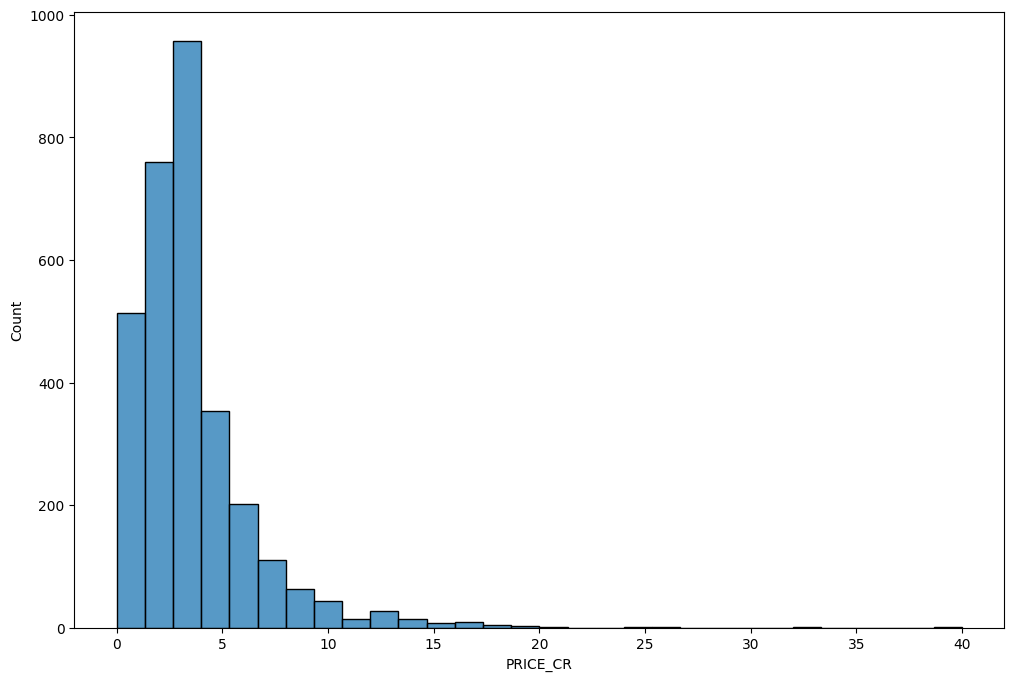

In [217]:
plt.figure(figsize=(12,8))
sns.histplot(df['PRICE_CR'],bins = 30)

In [218]:
bins = [0, 1, 2, 3, 4, 5,6]
labels = ['0-1Cr','1-3Cr','3-7Cr','7-13Cr','13-17Cr','17cr-25cr']

df['PRICE_RANGE'] = pd.cut(df['PRICE_CR'], bins=bins, labels=labels)

df['PRICE_RANGE'].value_counts()

C:\Users\shres\AppData\Local\Temp\ipykernel_28876\2608574274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRICE_RANGE'] = pd.cut(df['PRICE_CR'], bins=bins, labels=labels)


PRICE_RANGE
3-7Cr        861
7-13Cr       625
0-1Cr        452
1-3Cr        339
13-17Cr      276
17cr-25cr    161
Name: count, dtype: int64

In [219]:
grouped = df.groupby('PRICE_RANGE').agg({
    'BEDROOM':'mean',
    'BATHROOM':'mean',
    'BUILDUP_AREA_SQFT': lambda x: x.replace(0, pd.NA).mean(),
    'LAND_AREA_AANA':'mean'
}).round(2)


C:\Users\shres\AppData\Local\Temp\ipykernel_28876\301996341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('PRICE_RANGE').agg({


In [220]:
df['BUILDUP_AREA_SQFT'] = df['BUILDUP_AREA_SQFT'].replace(0, -1)

C:\Users\shres\AppData\Local\Temp\ipykernel_28876\945525495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUILDUP_AREA_SQFT'] = df['BUILDUP_AREA_SQFT'].replace(0, -1)


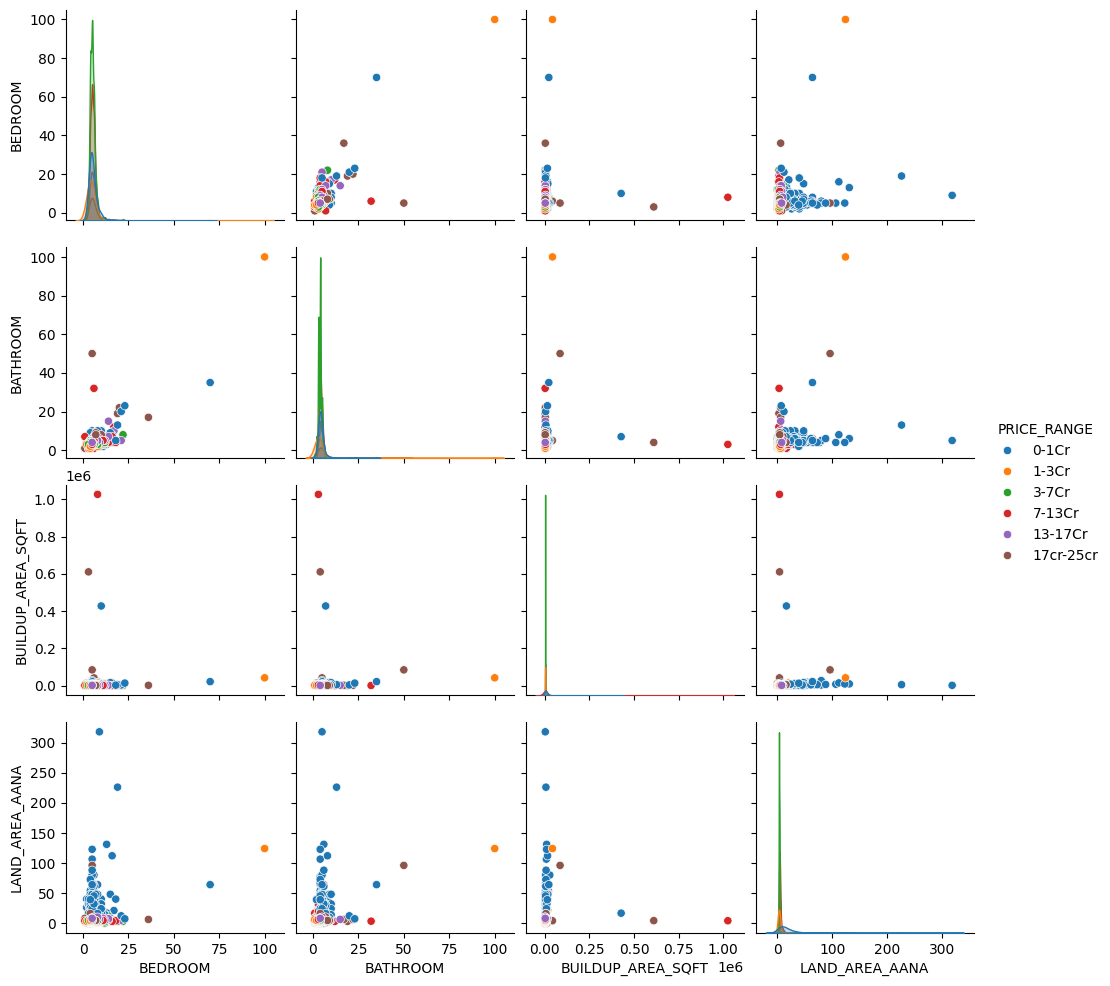

In [221]:
sns.pairplot(df[['BEDROOM','BATHROOM','BUILDUP_AREA_SQFT','LAND_AREA_AANA','PRICE_RANGE']], 
             hue='PRICE_RANGE')


In [222]:
df.drop(['PRICE_RANGE'],axis=1,inplace=True)

C:\Users\shres\AppData\Local\Temp\ipykernel_28876\1988355900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['PRICE_RANGE'],axis=1,inplace=True)


In [223]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [224]:
X = df.drop(['PRICE_CR'],axis = 1)
y = df['PRICE_CR']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
rfg = RandomForestRegressor(n_estimators=100, random_state=2)

In [227]:
rfg.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [228]:


y_pred = rfg.predict(X_test)
print(f'R2 Score = {r2_score(y_test, y_pred):.4f}')

R2 Score = 0.2040


In [229]:
df

,BEDROOM,BATHROOM,LAND_AREA_AANA,BUILDUP_AREA_SQFT,HOUSE_AGE,FLOOR,CAR_PARKING,BIKE_PARKING,HAS_PARKING,NEIGHBOURHOOD_PRICE,ROAD_ACCESS_FEET,PRICE_CR
0,5.0,4.0,4.0,1368.000,6.0,3.0,1,2,1,2.867484,12.0,2.90
1,5.0,6.0,3.0,1025.750,6.0,4.5,2,2,1,3.698027,10.0,4.75
2,4.0,4.0,2.3,786.175,22.0,2.5,1,3,1,2.867484,10.0,1.99
3,4.0,3.0,7.0,2394.750,23.0,2.5,4,4,1,3.735197,12.0,4.00
4,4.0,4.0,6.0,2052.500,11.0,2.0,4,5,1,3.985000,20.0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...
3413,4.0,4.0,4.5,1539.125,6.0,2.5,0,3,1,2.600000,16.0,2.60
3414,3.0,3.0,4.5,1700.000,6.0,3.0,0,3,1,1.516400,16.0,3.00
3415,4.0,2.0,4.7,1700.000,10.0,2.5,0,3,1,2.737600,16.0,1.60
3416,5.0,3.0,6.3,3505.000,5.0,2.5,2,7,1,3.583333,16.0,3.50
